# RMSE and R^2 examples

In [466]:
import numpy as np
from numpy.random import default_rng
import matplotlib.pyplot as plt

In [467]:
def rmse(pred, obs):
    return np.sqrt(np.mean((pred - obs) ** 2))

def r2(pred, obs):
    corr_matrix = np.corrcoef(pred, obs)
    r = corr_matrix[0, 1]
    return r ** 2

def eval(xs, ys, ys_pred, y_0, y_n):
    print(f"rmse = {rmse(ys_pred, ys)}")
    print(f"r^2  = {r2(ys_pred, ys)}")
    
    fig, (ax0, ax1) = plt.subplots(2, sharex=True)
    
    # Model + data plot
    ax0.set_title("Model and data")
    ax0.set_ylim(0, 500)
    ax0.plot([x_min, x_max], [y_0, y_n], "r")
    ax0.scatter(x=xs, y=ys, s=1.0)
    
    # Residual plot
    y_diff = ys - ys_pred
    ax1.set_title("Residuals")
    ax1.plot([x_min, x_max], [0, 0], "r")
    ax1.scatter(x=xs, y=y_diff, s=1.0)
    
    plt.subplots_adjust(hspace=0.3)
    plt.show()

In [468]:
# Create random number generator with seed
rng = default_rng(42)

In [469]:
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 100

In [470]:
n = 500
x_min = 100.0
x_max = 200.0

# Generate x array, which we'll reuse across all four examples
xs = rng.uniform(x_min, x_max, n)

## Low RMSE, high R^2 

This is the "best" case, since we generally want to see a low RMSE and a high R^2.

rmse = 5.098637151245071
r^2  = 0.9784073452650675


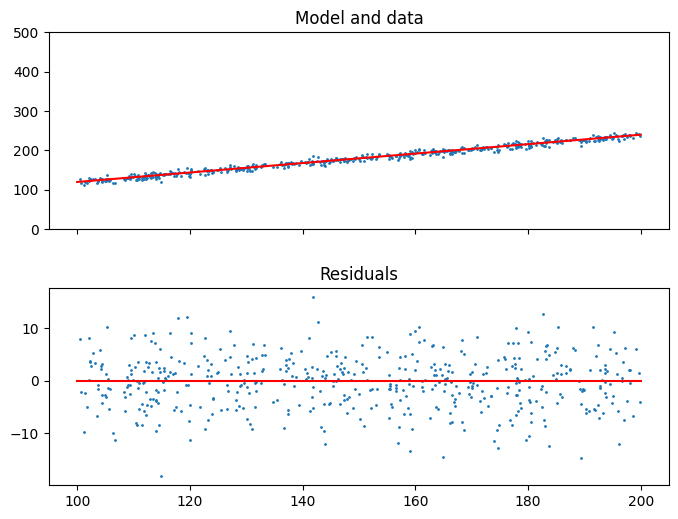

In [471]:
ys = 1.2 * xs + rng.normal(0.0, 5.0, n)
ys_pred = 1.2 * xs
eval(xs, ys, ys_pred, 1.2 * x_min, 1.2 * x_max)

## Low RMSE, low R^2 

A low RMSE means that error is low (good), but a low R^2 means that the observations don't line up well with the predictions (bad). This can occur, for instance, when the predictor isn't that useful, but the observed values are still easy to predict anyway just because they aren't that variable.

rmse = 5.881877856236798
r^2  = 0.0002646841250850277


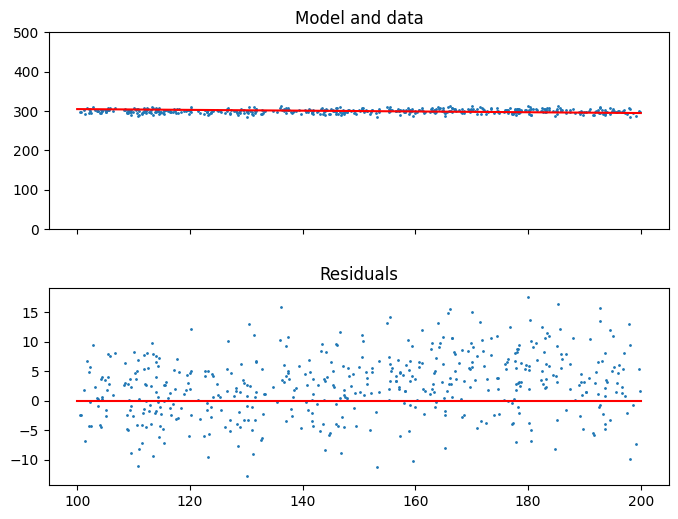

In [472]:
ys = rng.normal(300.0, 5.0, n)
ys_pred = 305.0 - 0.05 * xs
eval(xs, ys, ys_pred, 305.0, 295.0)

## High RMSE, high R^2 

A high RMSE means that error is high (bad), but a high R^2 means that the observations follow the predictions (good). This can happen when the model has a large bias, as the example below shows.

rmse = 120.93781957241825
r^2  = 0.9794613272257385


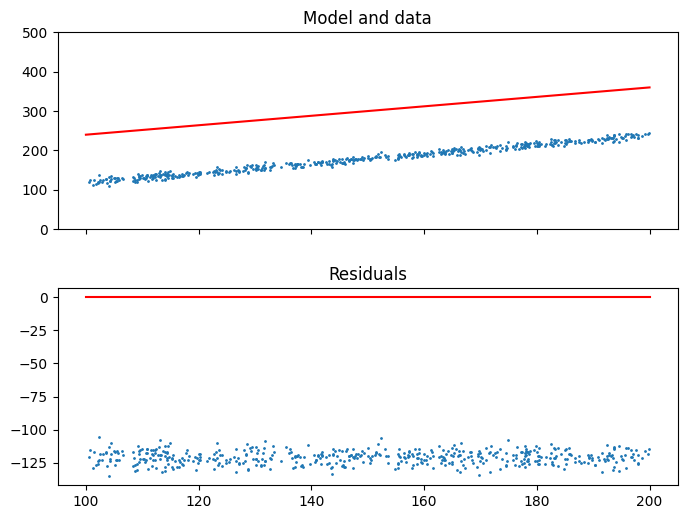

In [473]:
ys = 1.2 * xs + rng.normal(0.0, 5.0, n)
ys_pred = 1.2 * xs + 120.0
eval(xs, ys, ys_pred, 120.0 + 1.2 * x_min, 120.0 + 1.2 * x_max)

## High RMSE, low R^2

This is the worst case, since we have both high error (bad) and low correspondence between prediction and observation (bad).

rmse = 202.34227960479018
r^2  = 0.031088441543354873


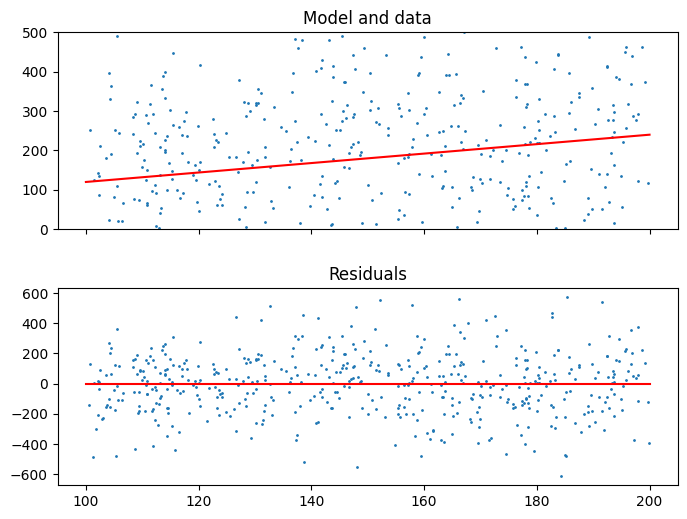

In [474]:
ys = 1.2 * xs + rng.normal(0.0, 200.0, n)
ys_pred = 1.2 * xs
eval(xs, ys, ys_pred, 1.2 * x_min, 1.2 * x_max)